In [77]:
import numpy as np # linear algebra
import pandas as pd# data analysis and manipulation
import os # assign path
import matplotlib.pyplot as plt# data visualization 
import seaborn as sns #data visualization & heatmap creation
from datetime import datetime
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import itertools

In [2]:
df = pd.read_csv('data/country_vaccinations1.csv')

In [3]:
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2/22/2021,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2/23/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2/24/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2/25/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2/26/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10752,Zimbabwe,ZWE,4/3/2021,132915.0,111588.0,21327.0,8162.0,8498.0,0.89,0.75,0.14,572.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1379872908...
10753,Zimbabwe,ZWE,4/4/2021,138900.0,117297.0,21603.0,5985.0,8537.0,0.93,0.79,0.15,574.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1379872908...
10754,Zimbabwe,ZWE,4/5/2021,145510.0,123454.0,22056.0,6610.0,9129.0,0.98,0.83,0.15,614.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1379872908...
10755,Zimbabwe,ZWE,4/6/2021,162633.0,139133.0,23500.0,17123.0,10967.0,1.09,0.94,0.16,738.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1379872908...


In [4]:
for col in df.columns: 
    print(col)

country
iso_code
date
total_vaccinations
people_vaccinated
people_fully_vaccinated
daily_vaccinations_raw
daily_vaccinations
total_vaccinations_per_hundred
people_vaccinated_per_hundred
people_fully_vaccinated_per_hundred
daily_vaccinations_per_million
vaccines
source_name
source_website


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10757 entries, 0 to 10756
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              10757 non-null  object 
 1   iso_code                             10757 non-null  object 
 2   date                                 10757 non-null  object 
 3   total_vaccinations                   6472 non-null   float64
 4   people_vaccinated                    5834 non-null   float64
 5   people_fully_vaccinated              4154 non-null   float64
 6   daily_vaccinations_raw               5417 non-null   float64
 7   daily_vaccinations                   10563 non-null  float64
 8   total_vaccinations_per_hundred       6472 non-null   float64
 9   people_vaccinated_per_hundred        5834 non-null   float64
 10  people_fully_vaccinated_per_hundred  4154 non-null   float64
 11  daily_vaccinations_per_milli

In [6]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,6.472000e+03,5.834000e+03,4.154000e+03,5.417000e+03,1.056300e+04,6472.000000,5834.000000,4154.000000,10563.000000
mean,3.565692e+06,2.550182e+06,1.154847e+06,1.178874e+05,6.971190e+04,12.127713,9.154373,4.361981,2835.101486
std,1.367473e+07,8.863178e+06,4.770130e+06,4.364602e+05,2.945452e+05,20.099445,13.529680,8.791505,5022.729887
min,0.000000e+00,0.000000e+00,1.000000e+00,-2.928600e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.094500e+04,4.836000e+04,2.168900e+04,3.161000e+03,9.860000e+02,0.950000,0.910000,0.470000,339.000000
50%,3.428795e+05,2.910530e+05,1.429075e+05,1.517700e+04,5.949000e+03,4.660000,3.735000,1.680000,1395.000000
75%,1.593779e+06,1.176837e+06,5.689088e+05,5.946300e+04,2.779400e+04,14.375000,11.057500,4.310000,3499.000000
max,1.788378e+08,1.144360e+08,6.820246e+07,7.185000e+06,5.190143e+06,185.040000,97.640000,87.400000,118759.000000


In [7]:
df.drop(["source_name","source_website"],axis=1, inplace=True)

In [8]:
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,AFG,2/22/2021,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca
1,Afghanistan,AFG,2/23/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
2,Afghanistan,AFG,2/24/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
3,Afghanistan,AFG,2/25/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
4,Afghanistan,AFG,2/26/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10752,Zimbabwe,ZWE,4/3/2021,132915.0,111588.0,21327.0,8162.0,8498.0,0.89,0.75,0.14,572.0,Sinopharm/Beijing
10753,Zimbabwe,ZWE,4/4/2021,138900.0,117297.0,21603.0,5985.0,8537.0,0.93,0.79,0.15,574.0,Sinopharm/Beijing
10754,Zimbabwe,ZWE,4/5/2021,145510.0,123454.0,22056.0,6610.0,9129.0,0.98,0.83,0.15,614.0,Sinopharm/Beijing
10755,Zimbabwe,ZWE,4/6/2021,162633.0,139133.0,23500.0,17123.0,10967.0,1.09,0.94,0.16,738.0,Sinopharm/Beijing


In [9]:
df.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     4285
people_vaccinated                      4923
people_fully_vaccinated                6603
daily_vaccinations_raw                 5340
daily_vaccinations                      194
total_vaccinations_per_hundred         4285
people_vaccinated_per_hundred          4923
people_fully_vaccinated_per_hundred    6603
daily_vaccinations_per_million          194
vaccines                                  0
dtype: int64

In [10]:
data = df.isna().sum()/len(df)
for i in range(len(data)):
    if data[i] != 0.0:
        print(data.index[i], ": ", data[i])

total_vaccinations :  0.3983452635493167
people_vaccinated :  0.4576554801524589
people_fully_vaccinated :  0.6138328530259366
daily_vaccinations_raw :  0.4964209352049828
daily_vaccinations :  0.01803476805800874
total_vaccinations_per_hundred :  0.3983452635493167
people_vaccinated_per_hundred :  0.4576554801524589
people_fully_vaccinated_per_hundred :  0.6138328530259366
daily_vaccinations_per_million :  0.01803476805800874


In [11]:
Bangladesh = df.loc[df['country'] == 'Bangladesh']

In [12]:
Bangladesh.shape

(72, 13)

In [13]:
df.mean()

total_vaccinations                     3.565692e+06
people_vaccinated                      2.550182e+06
people_fully_vaccinated                1.154847e+06
daily_vaccinations_raw                 1.178874e+05
daily_vaccinations                     6.971190e+04
total_vaccinations_per_hundred         1.212771e+01
people_vaccinated_per_hundred          9.154373e+00
people_fully_vaccinated_per_hundred    4.361981e+00
daily_vaccinations_per_million         2.835101e+03
dtype: float64

In [14]:
print(Bangladesh['date'].min())
print(Bangladesh['date'].max())

1/26/2021
4/7/2021


In [15]:
Bangladesh

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
797,Bangladesh,BGD,1/26/2021,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca
798,Bangladesh,BGD,1/27/2021,26.0,26.0,NaN,26.0,26.0,0.00,0.00,NaN,0.0,Oxford/AstraZeneca
799,Bangladesh,BGD,1/28/2021,567.0,567.0,NaN,541.0,284.0,0.00,0.00,NaN,2.0,Oxford/AstraZeneca
800,Bangladesh,BGD,1/29/2021,NaN,NaN,NaN,NaN,1209.0,NaN,NaN,NaN,7.0,Oxford/AstraZeneca
801,Bangladesh,BGD,1/30/2021,NaN,NaN,NaN,NaN,1671.0,NaN,NaN,NaN,10.0,Oxford/AstraZeneca
...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,Bangladesh,BGD,4/3/2021,5452634.0,5452634.0,NaN,NaN,31867.0,3.31,3.31,NaN,193.0,Oxford/AstraZeneca
865,Bangladesh,BGD,4/4/2021,5498172.0,5498172.0,NaN,45538.0,31936.0,3.34,3.34,NaN,194.0,Oxford/AstraZeneca
866,Bangladesh,BGD,4/5/2021,5539494.0,5539494.0,NaN,41322.0,31402.0,3.36,3.36,NaN,191.0,Oxford/AstraZeneca
867,Bangladesh,BGD,4/6/2021,NaN,NaN,NaN,NaN,29863.0,NaN,NaN,NaN,181.0,Oxford/AstraZeneca


In [16]:
Bangladesh.sort_values('date')

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
797,Bangladesh,BGD,1/26/2021,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca
798,Bangladesh,BGD,1/27/2021,26.0,26.0,NaN,26.0,26.0,0.00,0.00,NaN,0.0,Oxford/AstraZeneca
799,Bangladesh,BGD,1/28/2021,567.0,567.0,NaN,541.0,284.0,0.00,0.00,NaN,2.0,Oxford/AstraZeneca
800,Bangladesh,BGD,1/29/2021,NaN,NaN,NaN,NaN,1209.0,NaN,NaN,NaN,7.0,Oxford/AstraZeneca
801,Bangladesh,BGD,1/30/2021,NaN,NaN,NaN,NaN,1671.0,NaN,NaN,NaN,10.0,Oxford/AstraZeneca
...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,Bangladesh,BGD,4/3/2021,5452634.0,5452634.0,NaN,NaN,31867.0,3.31,3.31,NaN,193.0,Oxford/AstraZeneca
865,Bangladesh,BGD,4/4/2021,5498172.0,5498172.0,NaN,45538.0,31936.0,3.34,3.34,NaN,194.0,Oxford/AstraZeneca
866,Bangladesh,BGD,4/5/2021,5539494.0,5539494.0,NaN,41322.0,31402.0,3.36,3.36,NaN,191.0,Oxford/AstraZeneca
867,Bangladesh,BGD,4/6/2021,NaN,NaN,NaN,NaN,29863.0,NaN,NaN,NaN,181.0,Oxford/AstraZeneca


In [17]:
Bangladesh_new = Bangladesh.groupby('date')['daily_vaccinations'].sum().reset_index()

In [18]:
Bangladesh_new

,date,daily_vaccinations
0,1/26/2021,0.0
1,1/27/2021,26.0
2,1/28/2021,284.0
3,1/29/2021,1209.0
4,1/30/2021,1671.0
...,...,...
67,4/3/2021,31867.0
68,4/4/2021,31936.0
69,4/5/2021,31402.0
70,4/6/2021,29863.0


In [19]:
Bangladesh_new['date'] = pd.to_datetime(Bangladesh_new['date'], infer_datetime_format=True)
Bangladesh_new = Bangladesh_new.set_index('date')

In [20]:
Bangladesh_new.head(20)

,daily_vaccinations
date,
2021-01-26,0.0
2021-01-27,26.0
2021-01-28,284.0
2021-01-29,1209.0
2021-01-30,1671.0
2021-01-31,1949.0
2021-02-01,2134.0
2021-02-10,45549.0
2021-02-11,64108.0


In [21]:
y = Bangladesh_new['daily_vaccinations'].resample('D').mean()

In [22]:
y.tail(20)

date
2021-03-19    63738.0
2021-03-20    60377.0
2021-03-21    62604.0
2021-03-22    60380.0
2021-03-23    58584.0
2021-03-24    62134.0
2021-03-25    64519.0
2021-03-26    65747.0
2021-03-27    66974.0
2021-03-28    62614.0
2021-03-29    58254.0
2021-03-30    50654.0
2021-03-31    43055.0
2021-04-01    39034.0
2021-04-02    35450.0
2021-04-03    31867.0
2021-04-04    31936.0
2021-04-05    31402.0
2021-04-06    29863.0
2021-04-07    28325.0
Freq: D, Name: daily_vaccinations, dtype: float64

<AxesSubplot:xlabel='date'>

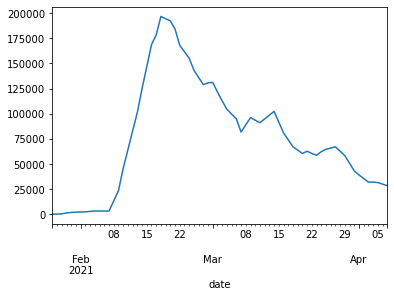

In [23]:
y.plot()

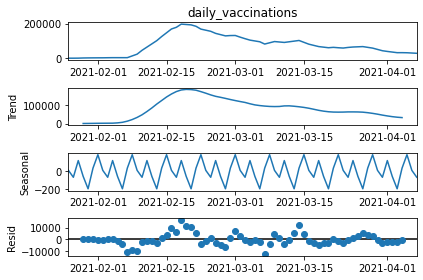

In [24]:
decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

In [25]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p,d,q))]

In [26]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 6)
SARIMAX: (0, 0, 1) x (0, 1, 0, 6)
SARIMAX: (0, 1, 0) x (0, 1, 1, 6)
SARIMAX: (0, 1, 0) x (1, 0, 0, 6)


In [27]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                           order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationary = False)
            results = mod.fit()
            print('ARIMA{}x{}6 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 6)6 - AIC:1856.1745914174157
ARIMA(0, 0, 0)x(0, 0, 1, 6)6 - AIC:1829.0530023570577


D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


ARIMA(0, 0, 0)x(0, 1, 0, 6)6 - AIC:1606.40624883414
ARIMA(0, 0, 0)x(0, 1, 1, 6)6 - AIC:1599.3399484120157
ARIMA(0, 0, 0)x(1, 0, 0, 6)6 - AIC:1752.6317917069846
ARIMA(0, 0, 0)x(1, 0, 1, 6)6 - AIC:1744.2983280623944
ARIMA(0, 0, 0)x(1, 1, 0, 6)6 - AIC:1602.5308221996495
ARIMA(0, 0, 0)x(1, 1, 1, 6)6 - AIC:1638.9849975742495
ARIMA(0, 0, 1)x(0, 0, 0, 6)6 - AIC:1810.3686952411003
ARIMA(0, 0, 1)x(0, 0, 1, 6)6 - AIC:1803.8712886461271
ARIMA(0, 0, 1)x(0, 1, 0, 6)6 - AIC:1522.0637309747735


D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 1)x(0, 1, 1, 6)6 - AIC:1515.6064691162417
ARIMA(0, 0, 1)x(1, 0, 0, 6)6 - AIC:1800.8454814659713
ARIMA(0, 0, 1)x(1, 0, 1, 6)6 - AIC:1802.8450248294953
ARIMA(0, 0, 1)x(1, 1, 0, 6)6 - AIC:1518.1445446683401
ARIMA(0, 0, 1)x(1, 1, 1, 6)6 - AIC:1561.8456803159088
ARIMA(0, 1, 0)x(0, 0, 0, 6)6 - AIC:1493.9537368979118
ARIMA(0, 1, 0)x(0, 0, 1, 6)6 - AIC:1496.6279736595636
ARIMA(0, 1, 0)x(0, 1, 0, 6)6 - AIC:1409.3902536775813
ARIMA(0, 1, 0)x(0, 1, 1, 6)6 - AIC:1385.3263374376731
ARIMA(0, 1, 0)x(1, 0, 0, 6)6 - AIC:1494.9923096837035
ARIMA(0, 1, 0)x(1, 0, 1, 6)6 - AIC:1498.3747524786336
ARIMA(0, 1, 0)x(1, 1, 0, 6)6 - AIC:1402.8993570265288
ARIMA(0, 1, 0)x(1, 1, 1, 6)6 - AIC:1388.3153659285888
ARIMA(0, 1, 1)x(0, 0, 0, 6)6 - AIC:1464.1050574779017
ARIMA(0, 1, 1)x(0, 0, 1, 6)6 - AIC:1464.8827196185775
ARIMA(0, 1, 1)x(0, 1, 0, 6)6 - AIC:1373.9600246940845
ARIMA(0, 1, 1)x(0, 1, 1, 6)6 - AIC:1350.5405732797365
ARIMA(0, 1, 1)x(1, 0, 0, 6)6 - AIC:1459.6582436432595
ARIMA(0, 1, 1)x(1, 0, 1, 6)6

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 1, 1, 6)6 - AIC:1372.0614977119085
ARIMA(1, 1, 0)x(0, 0, 0, 6)6 - AIC:1428.3486905806362
ARIMA(1, 1, 0)x(0, 0, 1, 6)6 - AIC:1429.8421866373515
ARIMA(1, 1, 0)x(0, 1, 0, 6)6 - AIC:1363.0492673740084
ARIMA(1, 1, 0)x(0, 1, 1, 6)6 - AIC:1321.8131781823097
ARIMA(1, 1, 0)x(1, 0, 0, 6)6 - AIC:1429.9268556056472
ARIMA(1, 1, 0)x(1, 0, 1, 6)6 - AIC:1431.788621474755
ARIMA(1, 1, 0)x(1, 1, 0, 6)6 - AIC:1349.8412105042892


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 1, 1, 6)6 - AIC:1322.4859487578697
ARIMA(1, 1, 1)x(0, 0, 0, 6)6 - AIC:1428.836266420451
ARIMA(1, 1, 1)x(0, 0, 1, 6)6 - AIC:1429.61585717133
ARIMA(1, 1, 1)x(0, 1, 0, 6)6 - AIC:1365.1674991387567


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 1, 1, 6)6 - AIC:1322.538848676624
ARIMA(1, 1, 1)x(1, 0, 0, 6)6 - AIC:1429.7644486761262
ARIMA(1, 1, 1)x(1, 0, 1, 6)6 - AIC:1431.6035941451357
ARIMA(1, 1, 1)x(1, 1, 0, 6)6 - AIC:1351.5776787813036
ARIMA(1, 1, 1)x(1, 1, 1, 6)6 - AIC:1324.2684022407504


In [28]:
mod = sm.tsa.statespace.SARIMAX(y,order = (1,1,0), seasonal_order = (0,1,1,6),enforce_stationarity = False,
                               enforce_invertibility = False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7870      0.141      5.594      0.000       0.511       1.063
ma.S.L6       -0.9972      0.212     -4.697      0.000      -1.413      -0.581
sigma2      7.155e+07   4.06e-10   1.76e+17      0.000    7.15e+07    7.15e+07


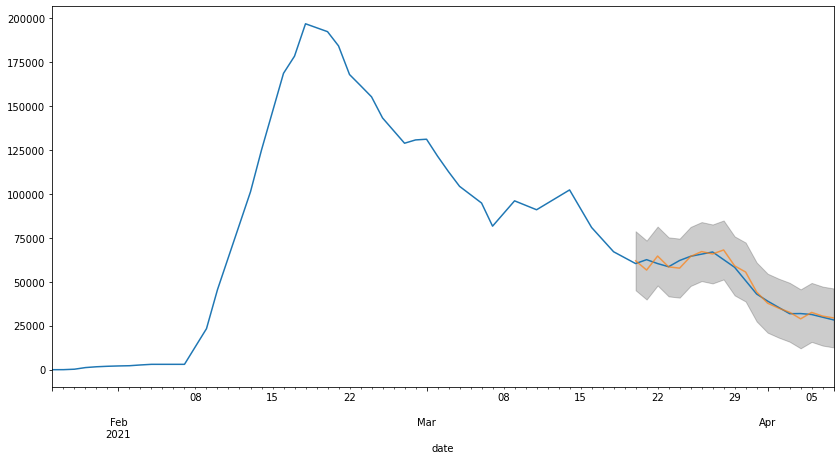

In [29]:
pred = results.get_prediction(start=pd.to_datetime('2021-03-20'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2021':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

## next activity 
check RMSC 
then predect future data 

In [80]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

date
2021-01-27     398.943662
2021-01-28     922.479584
2021-01-29    1421.277488
2021-01-30    1657.378621
2021-01-31    1969.811930
dtype: float64


In [81]:
predictions_ARIMA_log = pd.Series(Bangladesh_new['daily_vaccinations'], index = Bangladesh_new.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA_log.head()

date
2021-01-26       0.000000
2021-01-27     424.943662
2021-01-28    1206.479584
2021-01-29    2630.277488
2021-01-30    3328.378621
Freq: D, dtype: float64

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


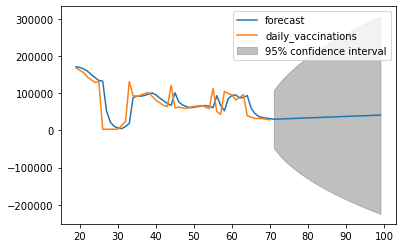

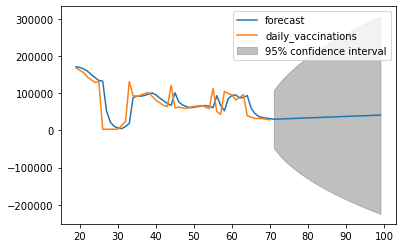

In [85]:
result_ARIMA.plot_predict(20, 100)

In [87]:
result = result_ARIMA.forecast(steps = 10)
result[1]

array([39717.62433716, 46666.94914025, 52707.86090451, 58124.28976082,
       63077.31382415, 67668.76663824, 71967.88476404, 76024.27833581,
       79874.93571548, 83548.30826906])